<h1> <center> Tutorial 0: Quickstart </center></h1>

---

Welcome to pyGOLD! This tutorial will get you up and running with your first optimization algorithm benchmark in just a few minutes. If you haven't already, install the pyGOLD library.

```sh
git clone https://github.nrel.gov/AI/pyGOLD.git
cd pyGOLD
pip install -e .
```

Now let's run a quick benchmark comparing two optimization algorithms on some standard test problems.

In [1]:
import pygold
from pygold.optimizer import BaseOptimizer, OptimizationResult
from scipy.optimize import differential_evolution, dual_annealing

## Part 1: Create Solver Wrappers
---

To be tested, pyGOLD requires algorithms to be implemented as subclasses of `BaseOptimizer`. Here are two quick examples. More details can be found in Tutorial 01 - Configuring Algorithms.

In [2]:
# Simple wrapper for Differential Evolution
class DifferentialEvolution(BaseOptimizer):
    deterministic = False  # Stochastic algorithm
    n_points = 15          # Uses multiple initial points

    def optimize(self, func, bounds, x0=None, constraints=None, **kwargs):
        result = differential_evolution(func, bounds, init=x0, **kwargs)
        return OptimizationResult(result.x, result.fun, algorithm=self.name)

# Simple wrapper for Dual Annealing
class DualAnnealing(BaseOptimizer):
    deterministic = False  # Stochastic algorithm
    n_points = 0           # Doesn't need initial points

    def optimize(self, func, bounds, x0=None, constraints=None, **kwargs):
        result = dual_annealing(func, bounds, **kwargs)
        return OptimizationResult(result.x, result.fun, algorithm=self.name)

## Part 2: Select Test Problems
---

pyGOLD comes with many built-in optimization problems. Let's select 2D unconstrained problems:

In [3]:
# Get 2D unconstrained problems
problems = pygold.get_standard_problems(["2D", "Unconstrained"])
print(f"Found {len(problems)} test problems:")
for prob in problems:
    print(f"  - {prob.__name__}")

Found 23 test problems:
  - HolderTable
  - Easom
  - Schaffer4
  - McCormick
  - Dejong5
  - GoldsteinPrice
  - Schaffer2
  - Matyas
  - EggHolder
  - Bohachevsky3
  - Booth
  - DropWave
  - Levy13
  - Bukin6
  - Bohachevsky2
  - Camel6
  - Branin
  - CrossInTray
  - Bohachevsky1
  - Camel3
  - Beale
  - Langermann
  - Shubert


## Part 3: Run the Benchmark
---

Now let's run both algorithms on all the problems:

In [4]:
# Create solver instances
solvers = [DifferentialEvolution(), DualAnnealing()]

# Run the benchmark
pygold.run_solvers(
    solvers=solvers,                    # List of solver instances
    problems=problems,                  # List of problems to use
    n_iters=3,                          # 3 runs per algorithm per problem
    output_folder="quickstart_output",  # Output folder
    verbose=True                        # Display progress in console
)

[codecarbon WARNING @ 14:50:04] Multiple instances of codecarbon are allowed to run at the same time.


Running DifferentialEvolution on HolderTable in 2D, iteration 1/3
Running DifferentialEvolution on HolderTable in 2D, iteration 2/3
Running DifferentialEvolution on HolderTable in 2D, iteration 3/3
Running DualAnnealing on HolderTable in 2D, iteration 1/3
Running DualAnnealing on HolderTable in 2D, iteration 2/3
Running DualAnnealing on HolderTable in 2D, iteration 3/3
Running DifferentialEvolution on Easom in 2D, iteration 1/3
Running DifferentialEvolution on Easom in 2D, iteration 2/3
Running DifferentialEvolution on Easom in 2D, iteration 3/3
Running DualAnnealing on Easom in 2D, iteration 1/3
Running DualAnnealing on Easom in 2D, iteration 2/3
Running DualAnnealing on Easom in 2D, iteration 3/3
Running DifferentialEvolution on Schaffer4 in 2D, iteration 1/3
Running DifferentialEvolution on Schaffer4 in 2D, iteration 2/3
Running DifferentialEvolution on Schaffer4 in 2D, iteration 3/3
Running DualAnnealing on Schaffer4 in 2D, iteration 1/3
Running DualAnnealing on Schaffer4 in 2D, it

### What's in the Output?

The benchmark created several files in the `quickstart_output/` folder:
- **`.info` files**: Problem and algorithm metadata
- **`.dat`, `.tdat`, `.mdat` files**: Raw function evaluation data
- **Energy data**: Power consumption measurements (if available)

## Part 4: Analyze the Results
---

Let's look at the performance of both algorithms:

In [5]:
from IPython.display import display
# Process the results
results = pygold.postprocessing.postprocess_data(
    ["quickstart_output/DifferentialEvolution", "quickstart_output/DualAnnealing"]
)

# Show function evaluation statistics
print("Average function evaluations per problem and accuracy level:")
display(results['data']['mean_fevals'])

Average function evaluations per problem and accuracy level:


,problem,solver,n_dims,target_0.1,target_0.01,target_0.0001,target_1e-08
0,Beale,DifferentialEvolution,2,51.500000,93.000000,300.500000,535.500000
1,Beale,DualAnnealing,2,202.000000,217.666667,231.666667,237.666667
2,Bohachevsky1,DifferentialEvolution,2,214.333333,269.333333,357.000000,549.333333
3,Bohachevsky1,DualAnnealing,2,761.000000,763.000000,766.000000,769.000000
4,Bohachevsky2,DifferentialEvolution,2,221.666667,291.000000,372.666667,528.666667
5,Bohachevsky2,DualAnnealing,2,1117.000000,1130.666667,1133.666667,1140.666667
6,Bohachevsky3,DifferentialEvolution,2,235.000000,276.333333,354.333333,582.333333
7,Bohachevsky3,DualAnnealing,2,976.666667,977.666667,983.666667,988.666667
8,Booth,DifferentialEvolution,2,127.333333,162.000000,296.333333,493.666667
9,Booth,DualAnnealing,2,18.000000,18.000000,18.000000,18.000000


### What does this show?
This table shows the average number of function evaluations required to get within `target` of the true optimal function value. NaN's show that the algorithm never succeeded in reaching the target accuracy.

## Part 5: Display Visualization
---
`postprocess_data` also creates plots in the ppfigures/ folder.

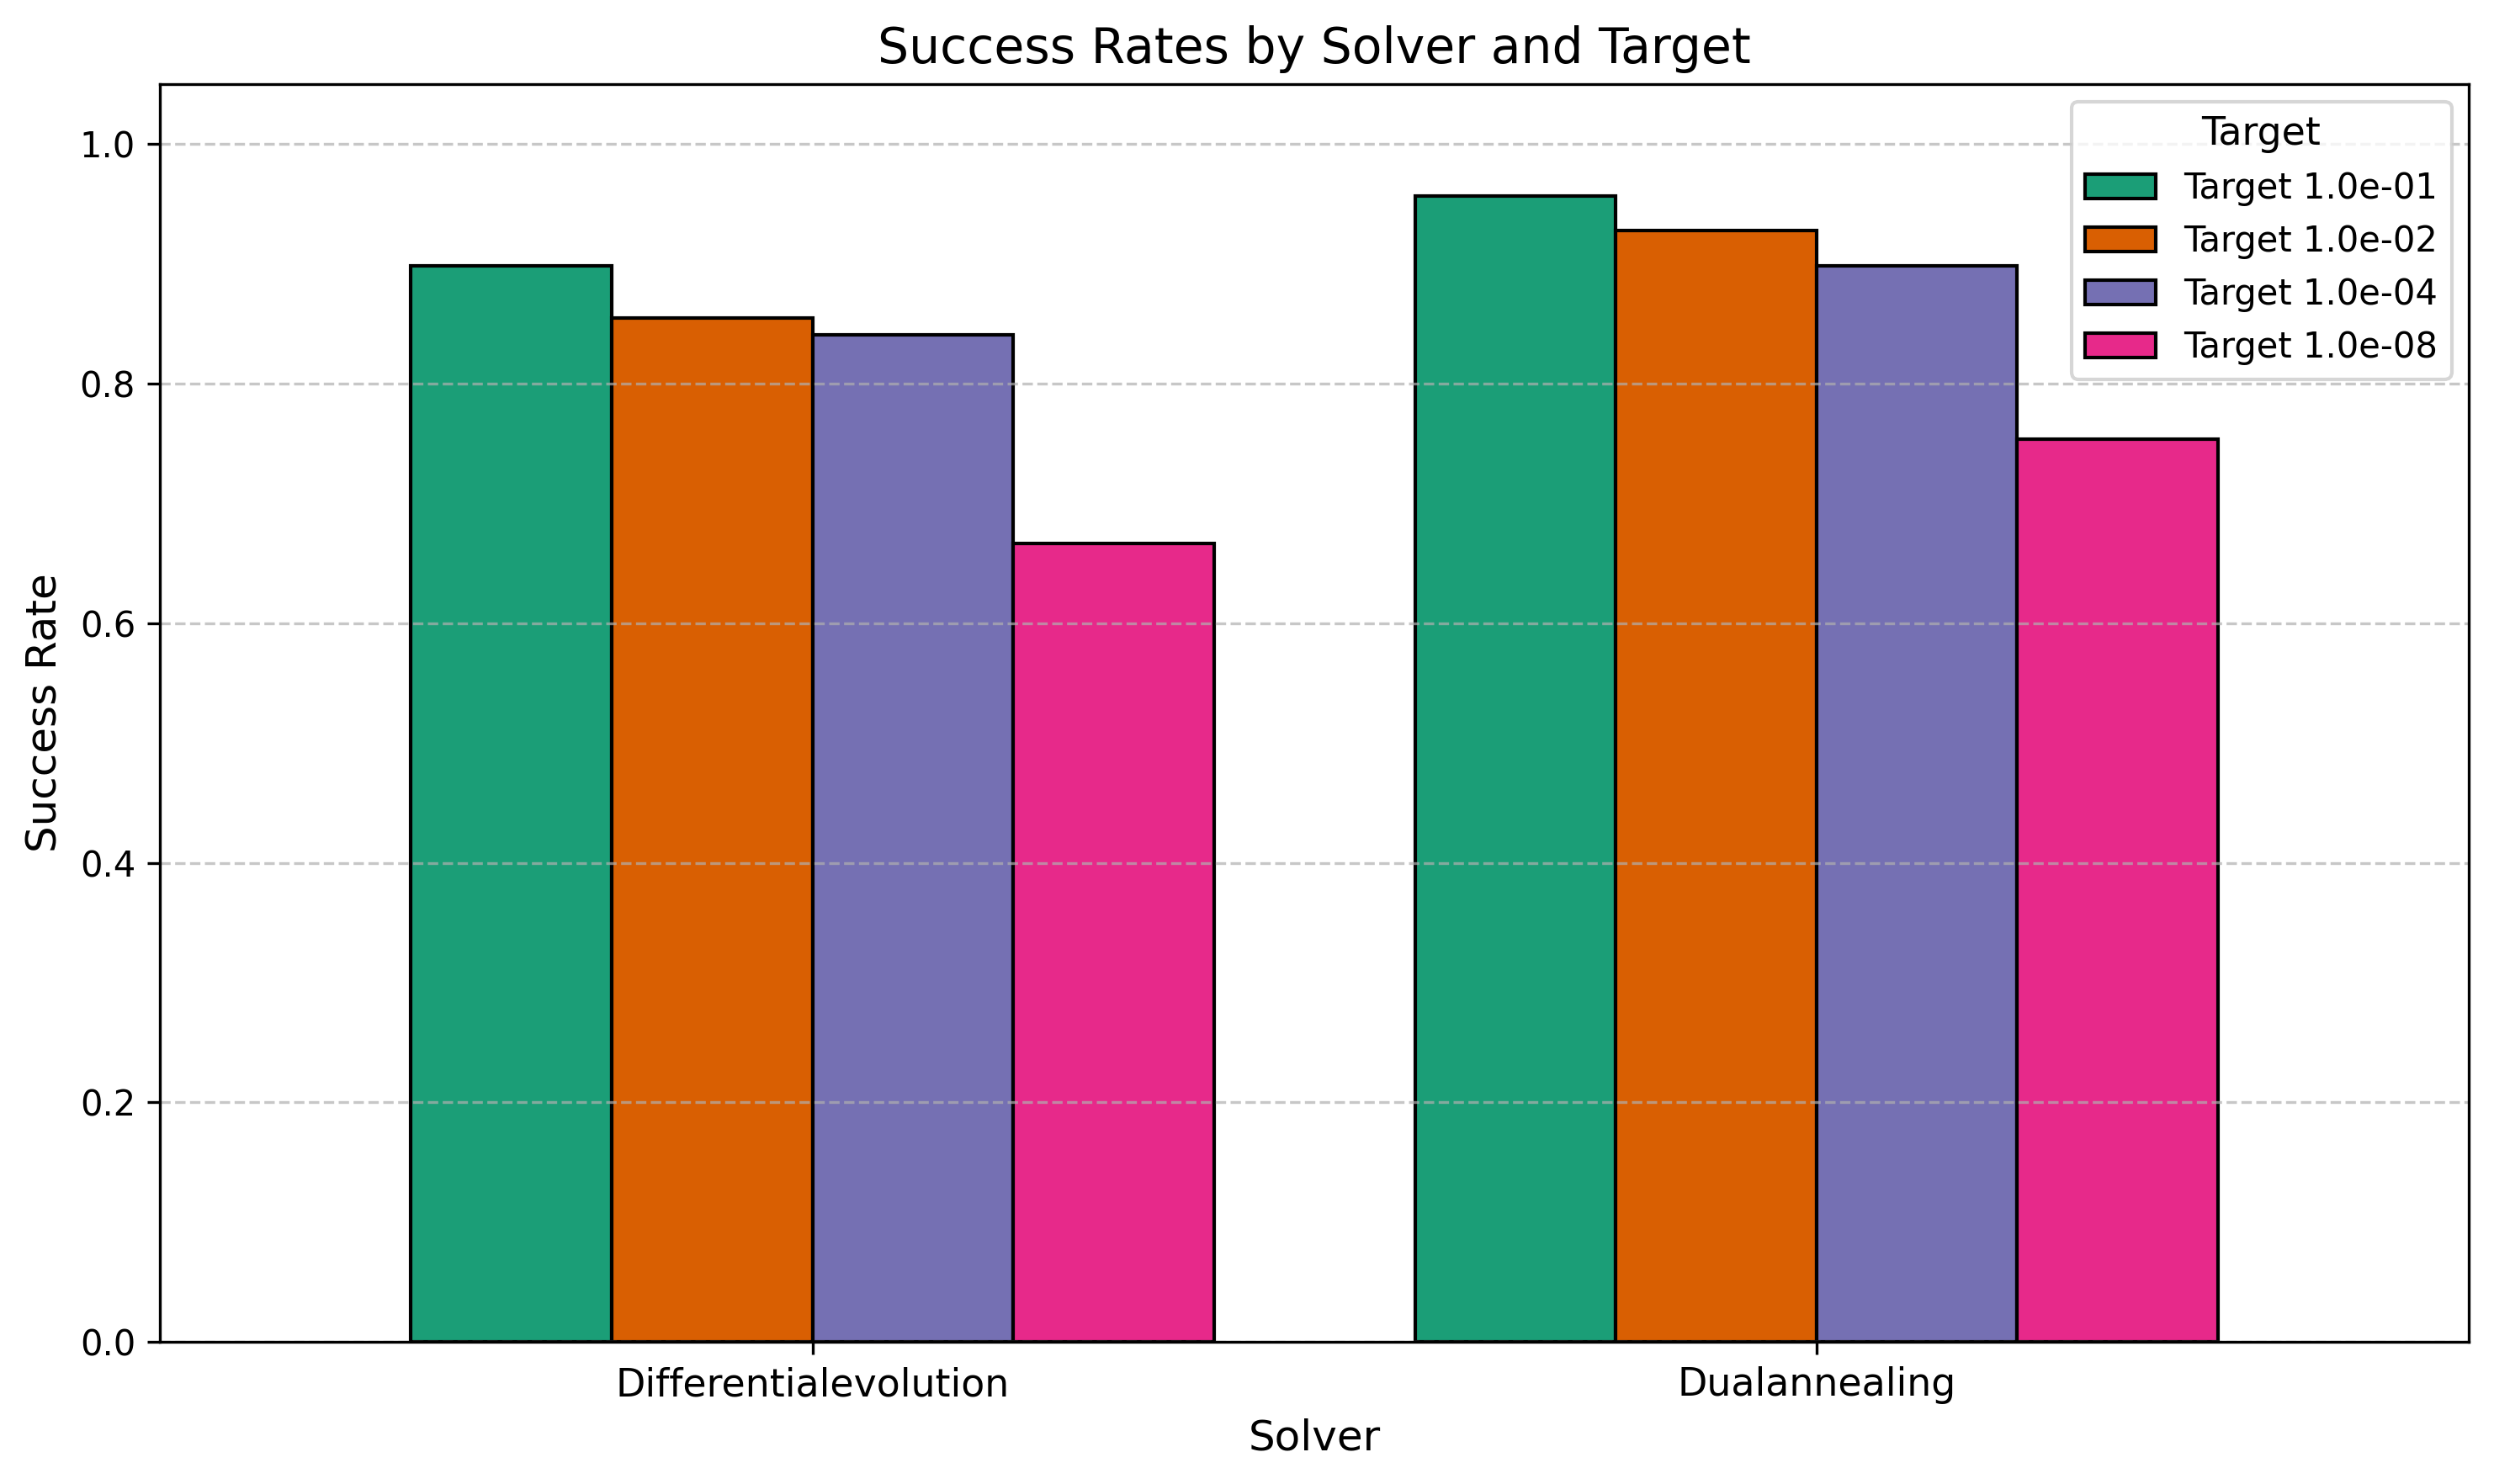

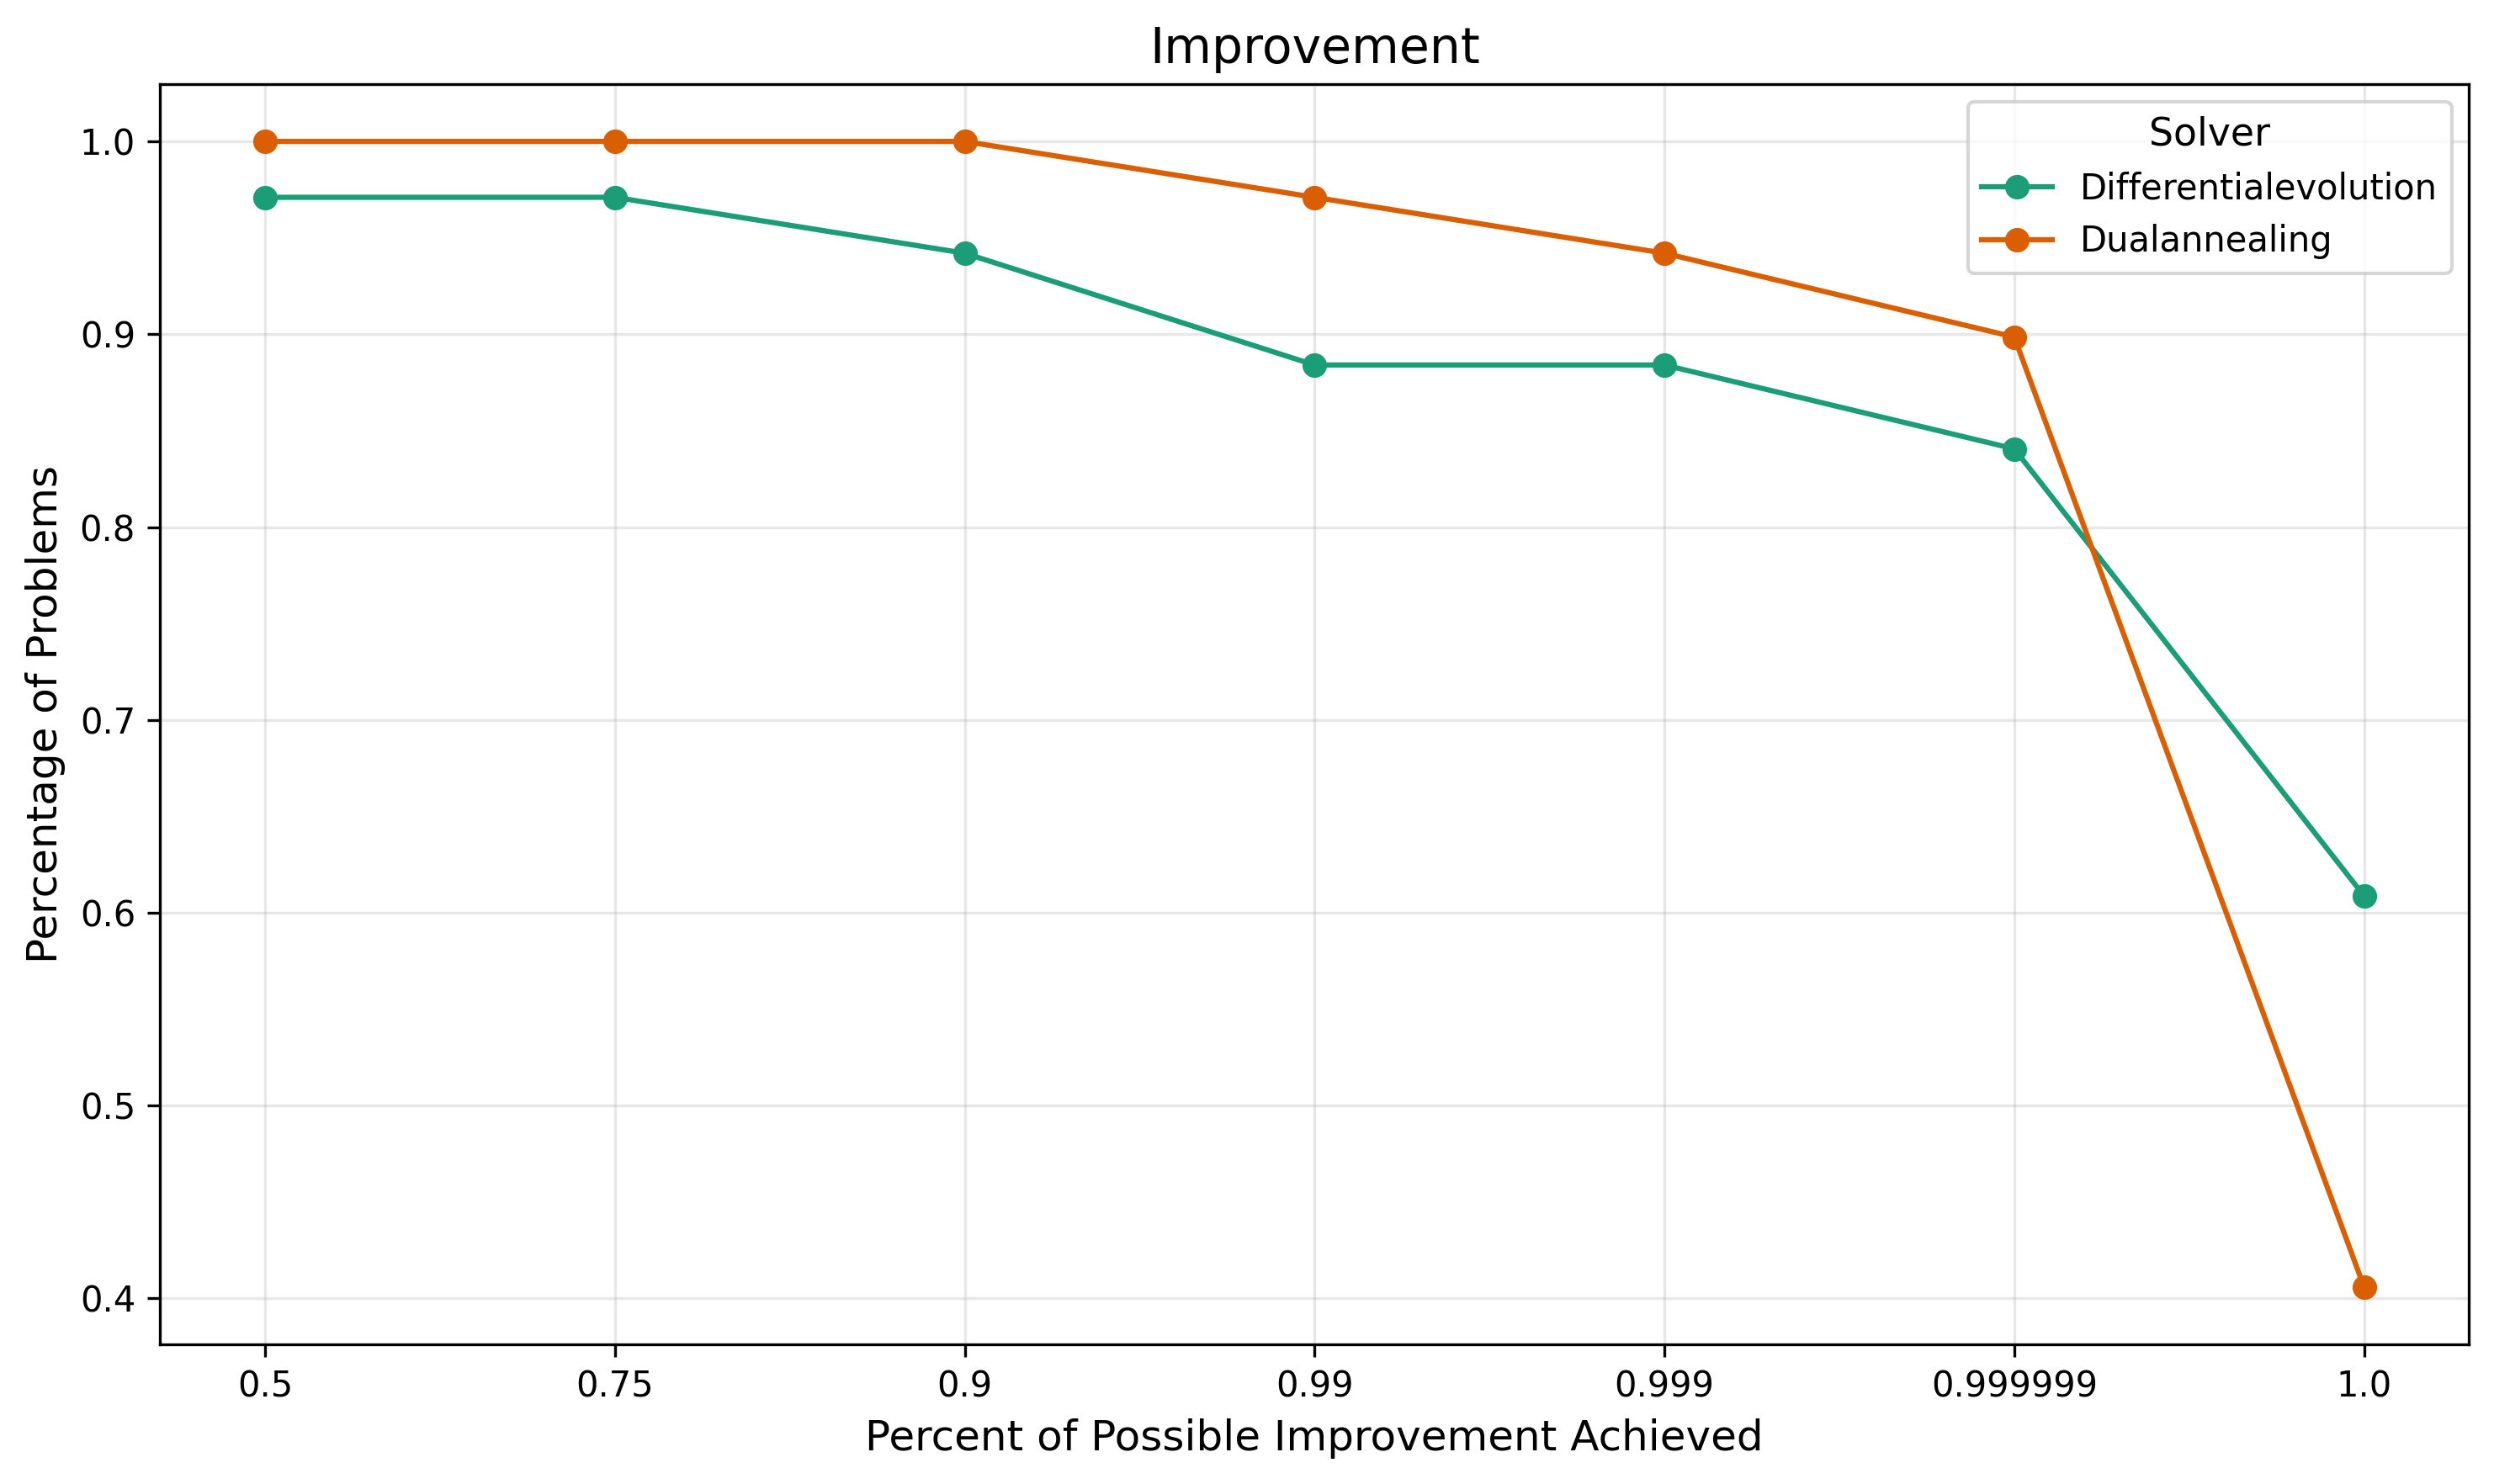

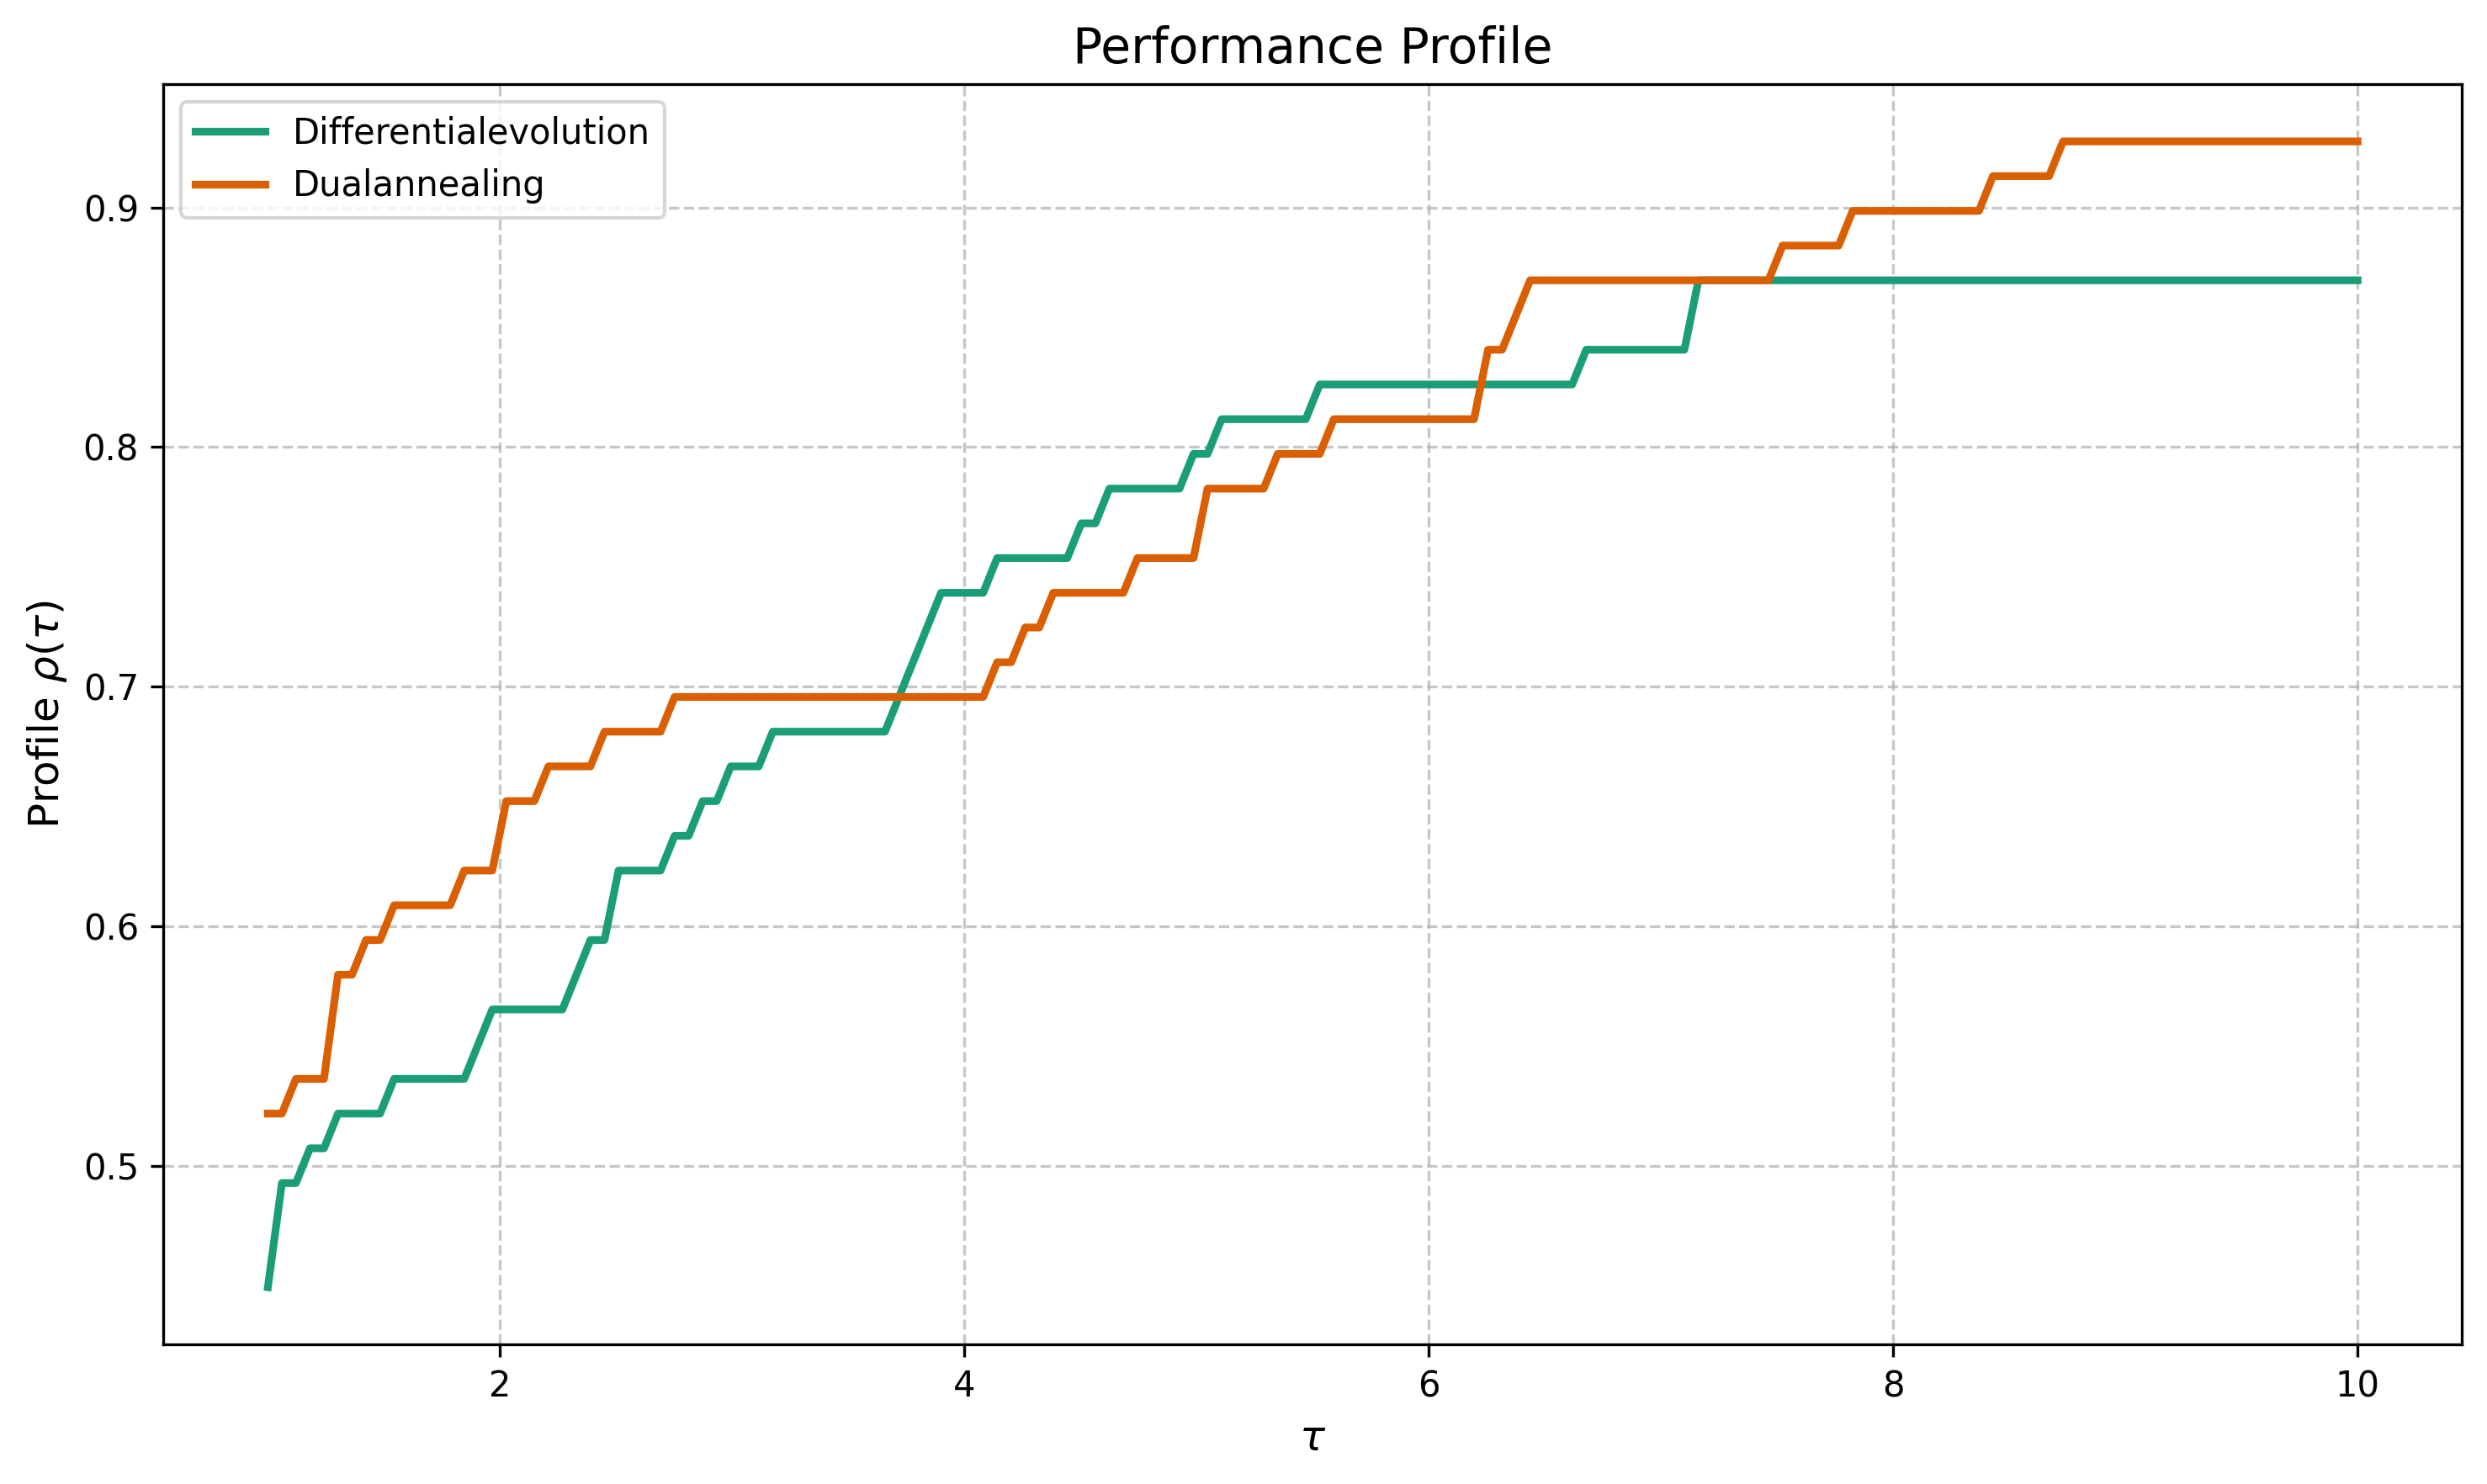

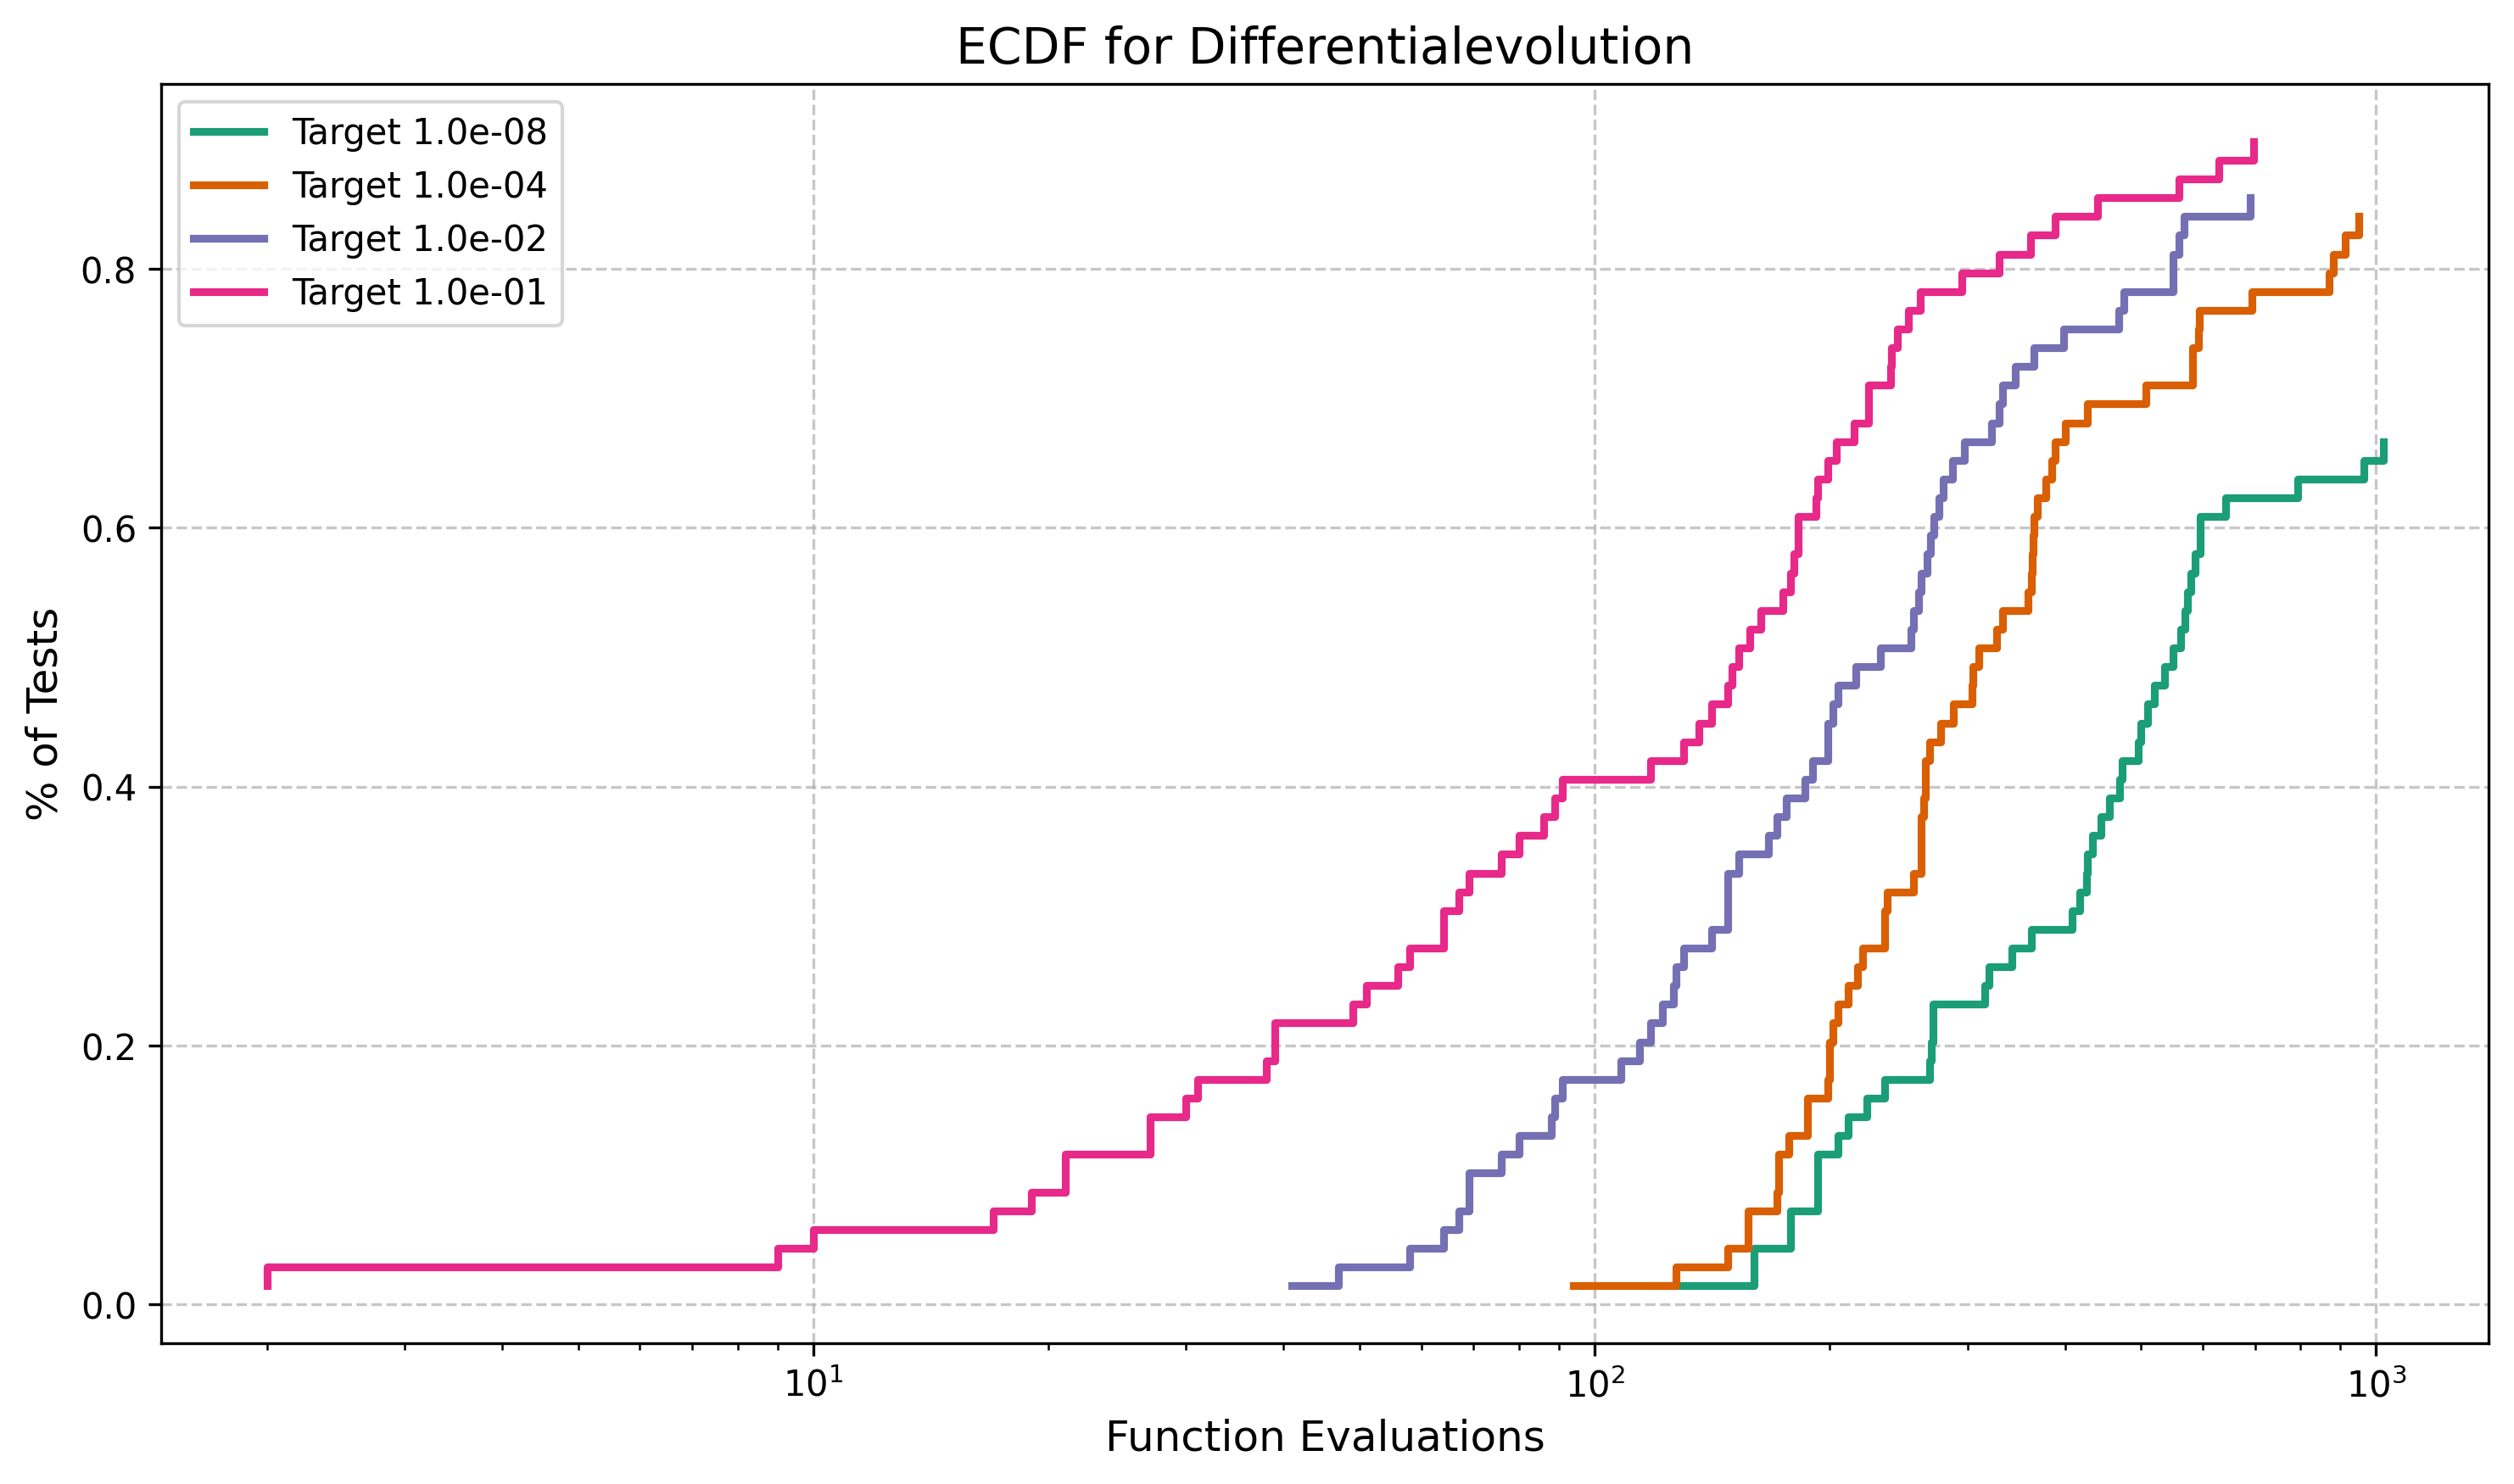

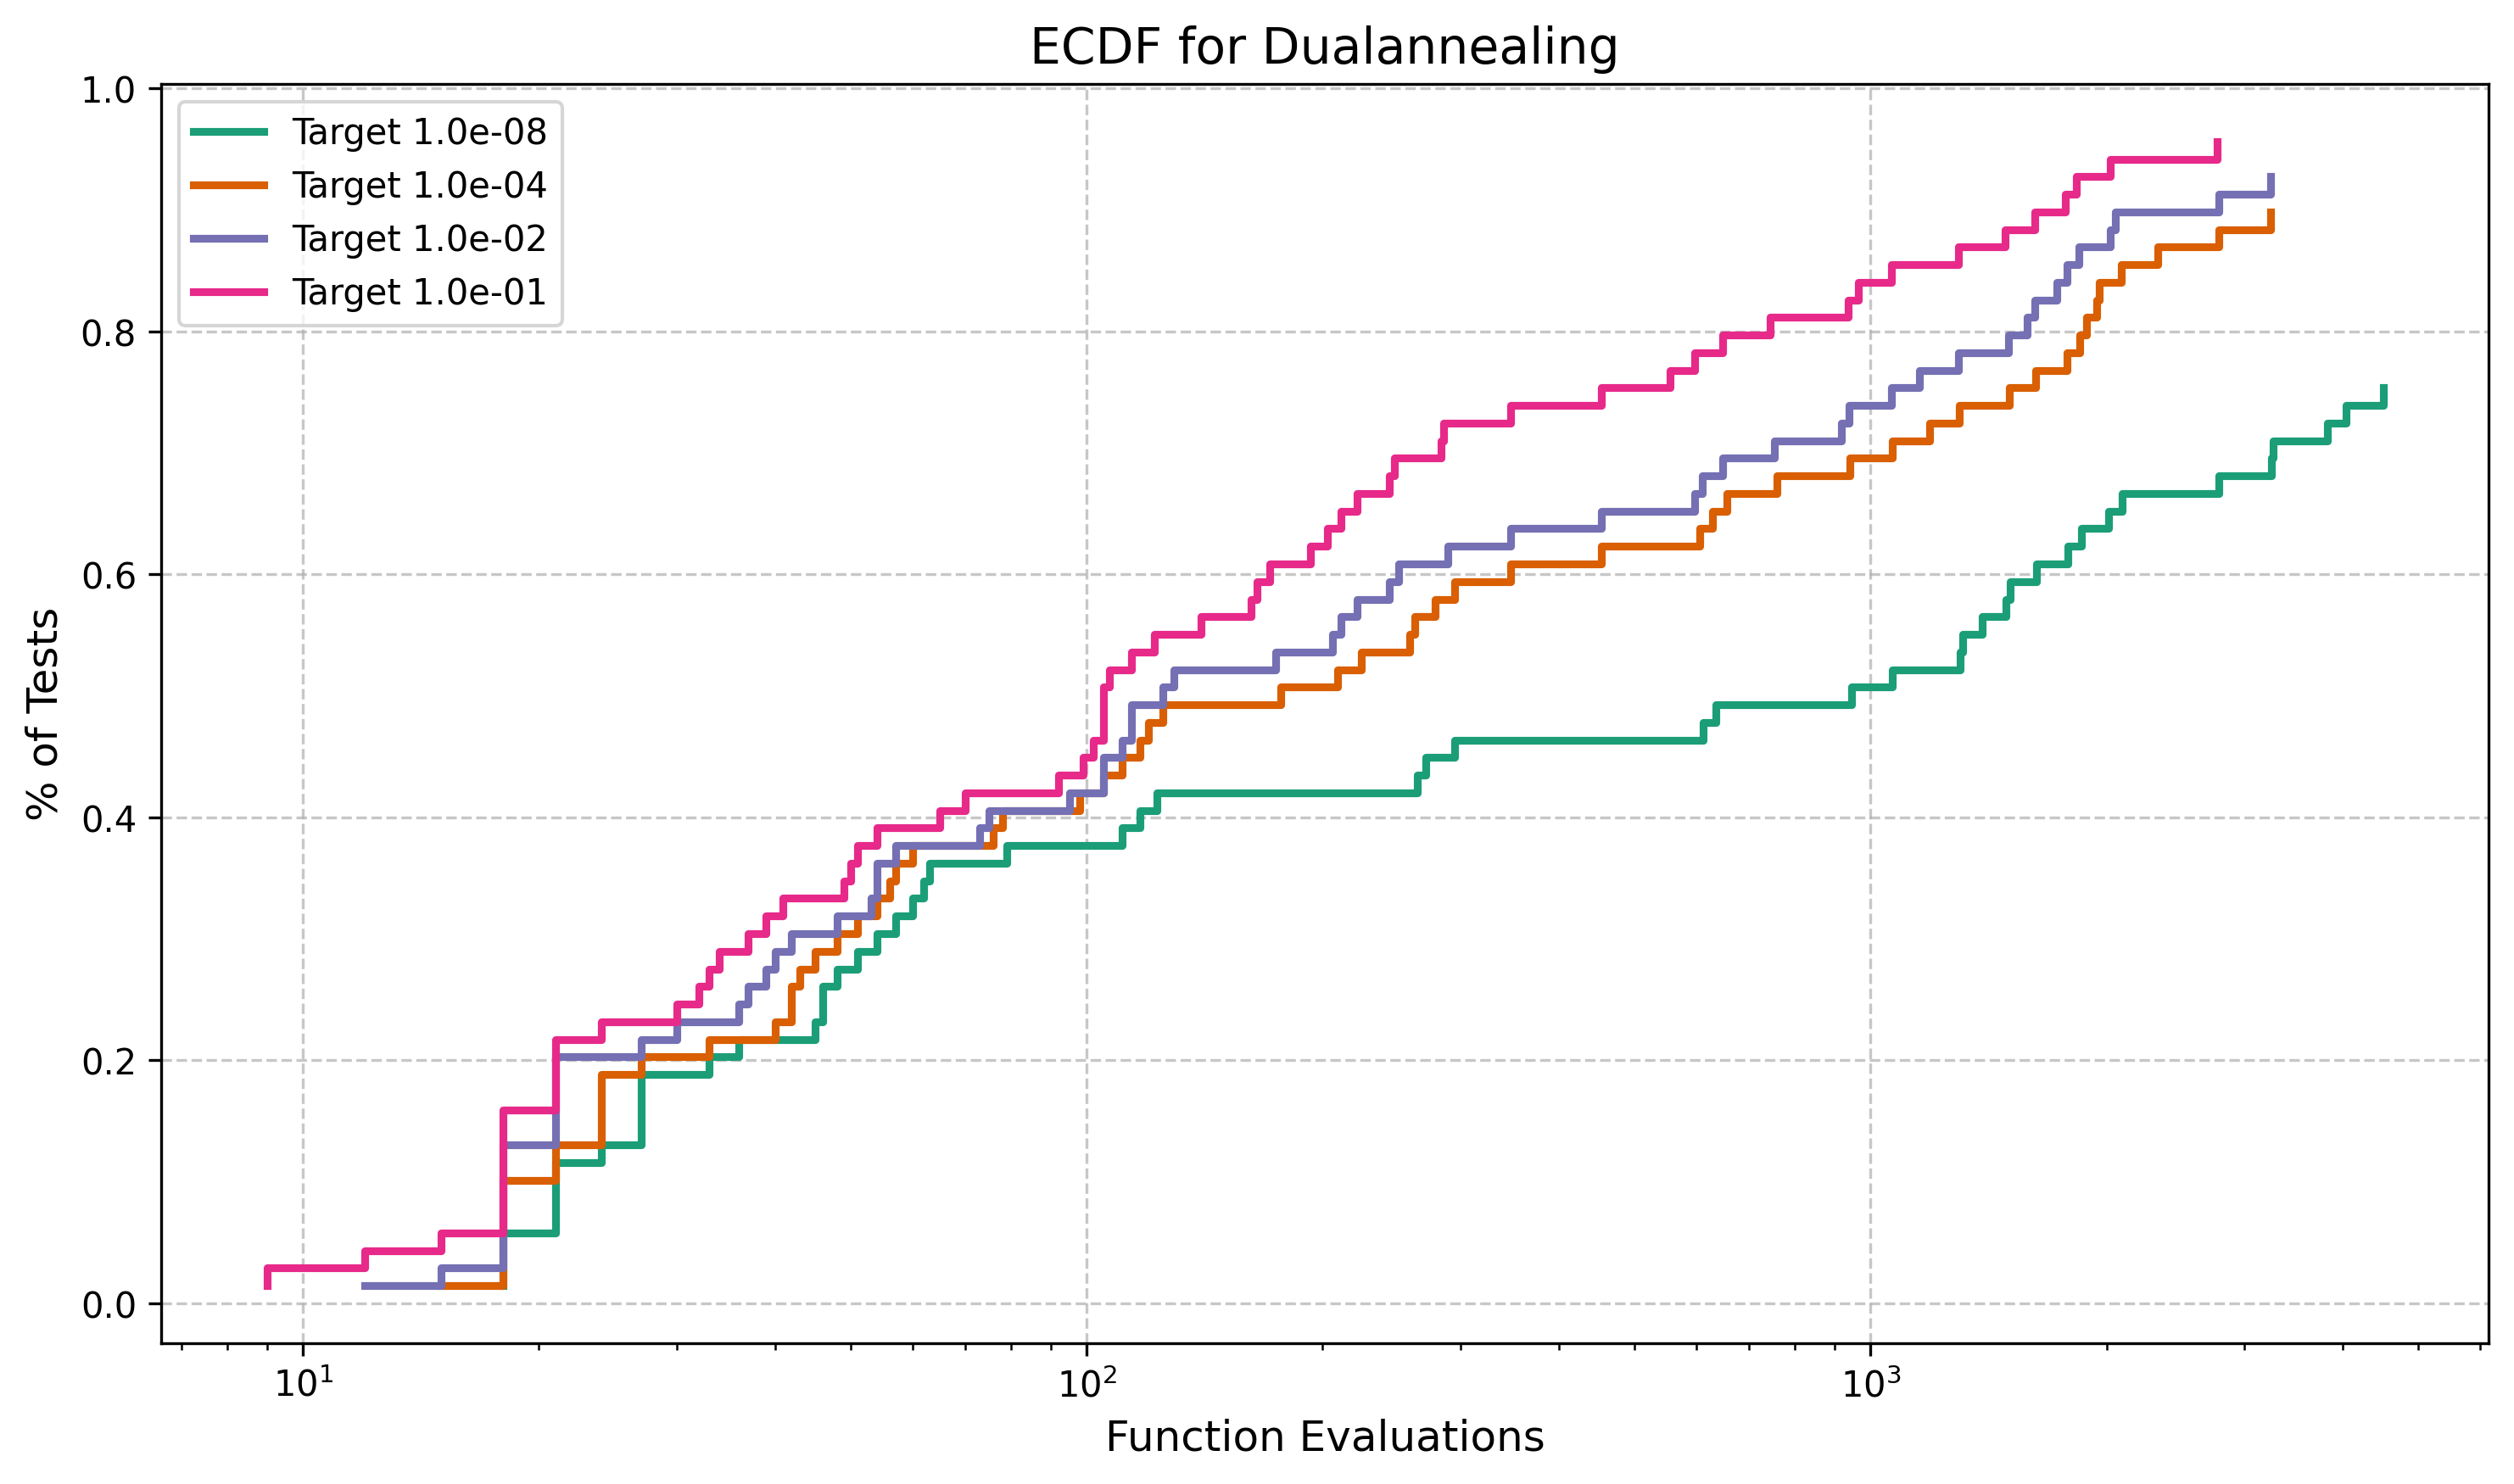

In [11]:
import glob
from IPython.display import display, Image

# Display visualization
figures = glob.glob("ppfigures/fevals/*.png")
for fig in figures:
    display(Image(fig, width=600))